# Copyright Netherlands eScience Center <br>
** Function     : Analyze AMET from coordinated experiments** <br>
** Author       : Yang Liu ** <br>
** First Built  : 2019.08.09 ** <br>
** Last Update  : 2019.08.09 ** <br>
Description     : This notebook aims to analyze AMET taken as the residuals of TOA/surface flux fields from multiple coordinated experiments in Blue Action WP3. It contributes to the Deliverable 3.1. <br>
Return Values   : netCDF4 <br>
Caveat          : The fields used here are post-processed monthly mean fields. It includes AMET from:
* EC Earth (DMI)
* CMCC-CM (CMCC)
* WACCM6 (WHOI)
* NorESM (NERSC)
* HadGEM  (UoS)
* EC Earth (NLeSC)

In [1]:
%matplotlib inline
import numpy as np
import sys
#sys.path.append("/home/ESLT0068/NLeSC/Computation_Modeling/Bjerknes/Scripts/META")
import analyzer
import scipy as sp
import time as tttt
from netCDF4 import Dataset,num2date
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [2]:
# constants
constant = {'g' : 9.80616,      # gravititional acceleration [m / s2]
            'R' : 6371009,      # radius of the earth [m]
            'cp': 1004.64,      # heat capacity of air [J/(Kg*K)]
            'Lv': 2264670,      # Latent heat of vaporization [J/Kg]
            'R_dry' : 286.9,    # gas constant of dry air [J/(kg*K)]
            'R_vap' : 461.5,    # gas constant for water vapour [J/(kg*K)]
            }

|Model and Organization | Exp 1 | Exp 2 | Exp 3 | Exp 4 |    time   |
|-----------------------|-------|-------|-------|-------|-----------|
|     EC Earth (DMI)    |   20  |   20  |   20  |   20  | 1979-2013 (exp1&2) 1979-2015 (exp3&4) |
|     CMCC-CM (CMCC)    |   10  |   10  |   0   |   0   | 1979-2014 |
|      WACCM6 (WHOI)    |   30  |   30  |   0   |   0   | 1979-2014 |
|     NorESM (NERSC)    |   20  |   20  |   20  |   20  | 1979-2014 |
|     HadGEM  (UoS)     |   10  |   10  |   5   |   5   | 1979-2014 |

In [3]:
################################   Input zone  ######################################
# specify starting and ending time
# specify data path
datapath = '/home/ESLT0068/WorkFlow/Core_Database_BlueAction_WP3/AMET_netCDF'
# specify output path for figures
output_path = '/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/JointAnalysis_AMET'
# how many models
models = 3
####################################################################################

In [4]:
################################   Extract variables  ######################################
# get path
# EC Earth (DMI)
datapath_DMI_exp1 = os.path.join(datapath, 'amet_ECEarth_DMI_exp1.nc')
datapath_DMI_exp2 = os.path.join(datapath, 'amet_ECEarth_DMI_exp2.nc')
datapath_DMI_exp3 = os.path.join(datapath, 'amet_ECEarth_DMI_exp3.nc')
datapath_DMI_exp4 = os.path.join(datapath, 'amet_ECEarth_DMI_exp4.nc')
# HadGEM (UoS)
datapath_UoS_exp1 = os.path.join(datapath, 'amet_HadGEM_UoS_exp1.nc')
datapath_UoS_exp2 = os.path.join(datapath, 'amet_HadGEM_UoS_exp2.nc')
datapath_UoS_exp3 = os.path.join(datapath, 'amet_HadGEM_UoS_exp3.nc')
datapath_UoS_exp4 = os.path.join(datapath, 'amet_HadGEM_UoS_exp4.nc')
# NorESM (NERSC)
datapath_NERSC_exp1 = os.path.join(datapath, 'amet_NorESM_NERSC_exp1.nc')
datapath_NERSC_exp2 = os.path.join(datapath, 'amet_NorESM_NERSC_exp2.nc')
datapath_NERSC_exp3 = os.path.join(datapath, 'amet_NorESM_NERSC_exp3.nc')
datapath_NERSC_exp4 = os.path.join(datapath, 'amet_NorESM_NERSC_exp4.nc')
# WACCM6 (WHOI)
datapath_WHOI_exp1 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp1.nc')
datapath_WHOI_exp2 = os.path.join(datapath, 'amet_WACCM6_WHOI_exp2.nc')
# get variable key
# EC Earth (DMI)
key_DMI_exp1 = Dataset(datapath_DMI_exp1)
key_DMI_exp2 = Dataset(datapath_DMI_exp2)
key_DMI_exp3 = Dataset(datapath_DMI_exp3)
key_DMI_exp4 = Dataset(datapath_DMI_exp4)
# HadGEM (UoS)
key_UoS_exp1 = Dataset(datapath_UoS_exp1)
key_UoS_exp2 = Dataset(datapath_UoS_exp2)
key_UoS_exp3 = Dataset(datapath_UoS_exp3)
key_UoS_exp4 = Dataset(datapath_UoS_exp4)
# NorESM (NERSC)
key_NERSC_exp1 = Dataset(datapath_NERSC_exp1)
key_NERSC_exp2 = Dataset(datapath_NERSC_exp2)
key_NERSC_exp3 = Dataset(datapath_NERSC_exp3)
key_NERSC_exp4 = Dataset(datapath_NERSC_exp4)
# WACCM6 (WHOI)
key_WHOI_exp1 = Dataset(datapath_WHOI_exp1)
key_WHOI_exp2 = Dataset(datapath_WHOI_exp2)
# get amet
# dimension[ensemble, year, month, lat]
# EC Earth (DMI)
################################   AMET  ######################################
AMET_DMI_exp1 = key_DMI_exp1.variables['amet'][:]
AMET_DMI_exp2 = key_DMI_exp2.variables['amet'][:]
AMET_DMI_exp3 = key_DMI_exp3.variables['amet'][:]
AMET_DMI_exp4 = key_DMI_exp4.variables['amet'][:]
# HadGEM (UoS)
AMET_UoS_exp1 = key_UoS_exp1.variables['amet'][:]
AMET_UoS_exp2 = key_UoS_exp2.variables['amet'][:]
AMET_UoS_exp3 = key_UoS_exp3.variables['amet'][:]
AMET_UoS_exp4 = key_UoS_exp4.variables['amet'][:]
# NorESM (NERSC)
AMET_NERSC_exp1 = key_NERSC_exp1.variables['amet'][:]
AMET_NERSC_exp2 = key_NERSC_exp2.variables['amet'][:]
AMET_NERSC_exp3 = key_NERSC_exp3.variables['amet'][:]
AMET_NERSC_exp4 = key_NERSC_exp4.variables['amet'][:]
# WACCM6 (WHOI)
AMET_WHOI_exp1 = key_WHOI_exp1.variables['amet'][:]
AMET_WHOI_exp2 = key_WHOI_exp2.variables['amet'][:]
# EC Earth (DMI)
lat_DMI = key_DMI_exp1.variables['latitude'][:]
# HadGEM (UoS)
lat_UoS = key_UoS_exp1.variables['latitude'][:]
# NorESM (NERSC)
lat_NERSC = key_NERSC_exp1.variables['latitude'][:]
# WACCM6 (WHOI)
lat_WHOI = key_WHOI_exp1.variables['latitude'][:]

(10, 36, 12, 324)
59.999813
59.842934
59.842934
66.38889


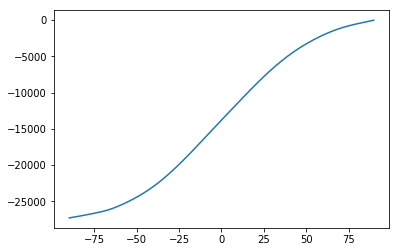

In [5]:
################################   Only for a first-check  ######################################
print(AMET_UoS_exp1.shape)
plt.plot(lat_UoS, np.mean(AMET_UoS_exp4[0,0,:,:],0))

print(lat_DMI[42])
print(lat_WHOI[32])
print(lat_NERSC[32])
print(lat_UoS[42])

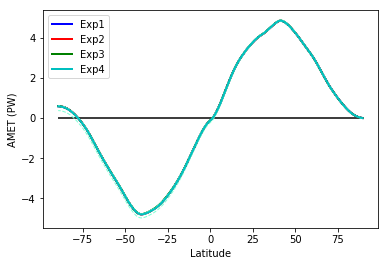

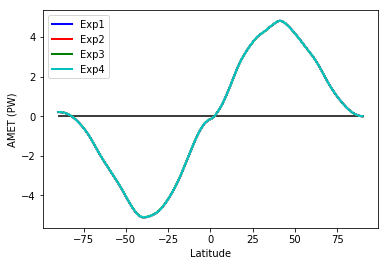

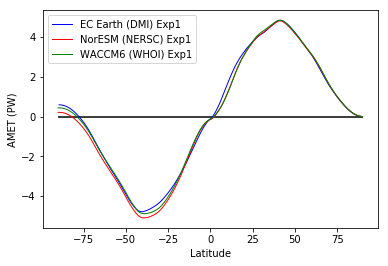

In [5]:
################################   Annual mean at different lat  ######################################
####################### color map #######################
####          ensemble mean 'b' 'r' 'g' 'c'          ####
####          members for 'b' : 'lightblue'          ####
####          members for 'r' : 'tomato'             ####
####          members for 'g' : 'lightgreen'         ####
####            large ensemble cm.rainbow            ####
####################### color map #######################
# EC Earth (DMI)
ens, yy, mm, _ = AMET_DMI_exp1.shape
fig = plt.figure()
plt.hlines(0,np.amin(lat_DMI), np.amax(lat_DMI),'k')
# Exp1
for i in range(ens):
    plt.plot(lat_DMI, np.mean(np.mean(AMET_DMI_exp1[i,:,:,:],1),0), color='lightblue',
             linestyle='--', linewidth=1)
plt.plot(lat_DMI, np.mean(np.mean(np.mean(AMET_DMI_exp1,2),1),0), 'b', linewidth=2, label='Exp1')
# Exp2
for i in range(ens):
    plt.plot(lat_DMI, np.mean(np.mean(AMET_DMI_exp2[i,:,:,:],1),0), color='tomato',
             linestyle='--', linewidth=1)
plt.plot(lat_DMI, np.mean(np.mean(np.mean(AMET_DMI_exp2,2),1),0), 'r', linewidth=2, label='Exp2')
# Exp3
for i in range(ens):
    plt.plot(lat_DMI, np.mean(np.mean(AMET_DMI_exp3[i,:,:,:],1),0), color='lightgreen',
             linestyle='--', linewidth=1)
plt.plot(lat_DMI, np.mean(np.mean(np.mean(AMET_DMI_exp3,2),1),0), 'g', linewidth=2, label='Exp3')
# Exp4
for i in range(ens):
    plt.plot(lat_DMI, np.mean(np.mean(AMET_DMI_exp4[i,:,:,:],1),0), color='aquamarine',
             linestyle='--', linewidth=1)
plt.plot(lat_DMI, np.mean(np.mean(np.mean(AMET_DMI_exp4,2),1),0), 'c', linewidth=2, label='Exp4')
plt.xlabel("Latitude")
plt.ylabel("AMET (PW)")
plt.legend()
plt.show()
fig.savefig(os.path.join(output_path,'DMI_annual_mean.png'),dpi=300)
plt.close(fig)

# NorESM (NERSC)
ens, yy, mm, _ = AMET_NERSC_exp1.shape
fig = plt.figure()
plt.hlines(0,np.amin(lat_NERSC), np.amax(lat_NERSC),'k')
# Exp1
for i in range(ens):
    plt.plot(lat_NERSC, np.mean(np.mean(AMET_NERSC_exp1[i,:,:,:],1),0), color='lightblue',
             linestyle='--', linewidth=1)
plt.plot(lat_NERSC, np.mean(np.mean(np.mean(AMET_NERSC_exp1,2),1),0), 'b', linewidth=2, label='Exp1')
# Exp2
for i in range(ens):
    plt.plot(lat_NERSC, np.mean(np.mean(AMET_NERSC_exp2[i,:,:,:],1),0), color='tomato',
             linestyle='--', linewidth=1)
plt.plot(lat_NERSC, np.mean(np.mean(np.mean(AMET_NERSC_exp2,2),1),0), 'r', linewidth=2, label='Exp2')
# Exp3
for i in range(ens):
    plt.plot(lat_NERSC, np.mean(np.mean(AMET_NERSC_exp3[i,:,:,:],1),0), color='lightgreen',
             linestyle='--', linewidth=1)
plt.plot(lat_NERSC, np.mean(np.mean(np.mean(AMET_NERSC_exp3,2),1),0), 'g', linewidth=2, label='Exp3')
# Exp4
for i in range(ens):
    plt.plot(lat_NERSC, np.mean(np.mean(AMET_NERSC_exp4[i,:,:,:],1),0), color='aquamarine',
             linestyle='--', linewidth=1)
plt.plot(lat_NERSC, np.mean(np.mean(np.mean(AMET_NERSC_exp4,2),1),0), 'c', linewidth=2, label='Exp4')
plt.xlabel("Latitude")
plt.ylabel("AMET (PW)")
plt.legend()
plt.show()
fig.savefig(os.path.join(output_path,'NERSC_annual_mean.png'),dpi=300)
plt.close(fig)

# all
colormap=cm.rainbow(range(models))
fig = plt.figure()
plt.hlines(0,np.amin(lat_NERSC), np.amax(lat_NERSC),'k')
plt.plot(lat_DMI, np.mean(np.mean(np.mean(AMET_DMI_exp1,2),1),0), color='b', linewidth=1, label='EC Earth (DMI) Exp1')
plt.plot(lat_NERSC, np.mean(np.mean(np.mean(AMET_NERSC_exp1,2),1),0), color='r', linewidth=1, label='NorESM (NERSC) Exp1')
#plt.plot(lat_UoS, np.mean(np.mean(np.mean(AMET_UoS_exp1,2),1),0), color=colormap[2], linewidth=1, label='HadGEM (UoS) Exp1')
plt.plot(lat_WHOI, np.mean(np.mean(np.mean(AMET_WHOI_exp1,2),1),0), color='g', linewidth=1, label='WACCM6 (WHOI) Exp1')
plt.xlabel("Latitude")
plt.ylabel("AMET (PW)")
plt.legend()
plt.show()
fig.savefig(os.path.join(output_path,'All_annual_mean_exp1.png'),dpi=300)
plt.close(fig)

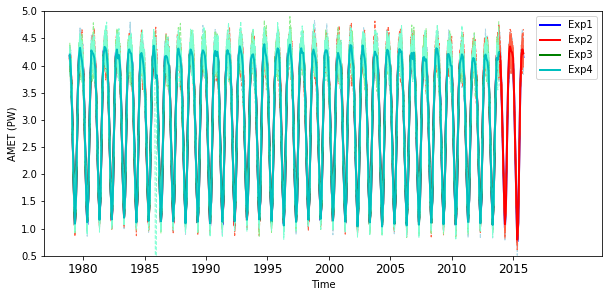

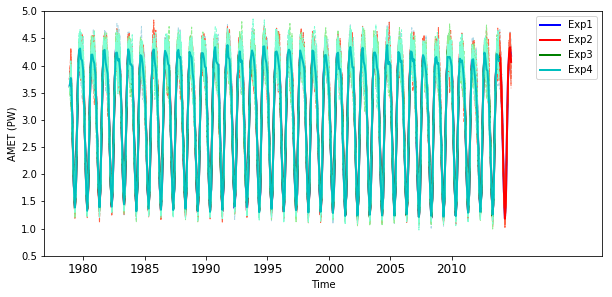

In [7]:
################################   Time series at certain sections  ######################################
# lat 60N
lat_DMI_60N = 42
lat_WHOI_60N = 32
lat_NERSC_60N = 32
# EC Earth (DMI)
ens, yy, mm, _ = AMET_DMI_exp1.shape
ens_3, yy_3, mm_3, _ = AMET_DMI_exp3.shape
index = np.arange(yy*mm)
index_3 = np.arange(yy_3*mm_3)
index_year = np.arange(1980,2020,5)
fig = plt.figure(figsize=(10,4.5))
#plt.hlines(0,np.amin(lat_DMI), np.amax(lat_DMI),'k')
# Exp1
for i in range(ens):
    plt.plot(index, AMET_DMI_exp1[i,:,:,lat_DMI_60N].reshape(yy*mm), color='lightblue',
             linestyle='--', linewidth=1)
plt.plot(index, np.mean(AMET_DMI_exp1[:,:,:,lat_DMI_60N],0).reshape(yy*mm), 'b', linewidth=2, label='Exp1')
# Exp2
for i in range(ens):
    plt.plot(index, AMET_DMI_exp2[i,:,:,lat_DMI_60N].reshape(yy*mm), color='tomato',
             linestyle='--', linewidth=1)
plt.plot(index, np.mean(AMET_DMI_exp2[:,:,:,lat_DMI_60N],0).reshape(yy*mm), 'r', linewidth=2, label='Exp2')
# Exp3
for i in range(ens_3):
    plt.plot(index_3, AMET_DMI_exp3[i,:,:,lat_DMI_60N].reshape(yy_3*mm_3), color='lightgreen',
             linestyle='--', linewidth=1)
plt.plot(index_3, np.mean(AMET_DMI_exp3[:,:,:,lat_DMI_60N],0).reshape(yy_3*mm_3), 'g', linewidth=2, label='Exp3')
# Exp4
for i in range(ens_3):
    plt.plot(index_3, AMET_DMI_exp4[i,:,:,lat_DMI_60N].reshape(yy_3*mm_3), color='aquamarine',
             linestyle='--', linewidth=1)
plt.plot(index_3, np.mean(AMET_DMI_exp4[:,:,:,lat_DMI_60N],0).reshape(yy_3*mm_3), 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(0.5,5)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'DMI_series_60N.png'),dpi=300)
plt.close(fig)

# NorESM (NERSC)
ens, yy, mm, _ = AMET_NERSC_exp1.shape
ens_3, yy_3, mm_3, _ = AMET_NERSC_exp3.shape
index = np.arange(yy*mm)
index_3 = np.arange(yy_3*mm_3)
index_year = np.arange(1980,2020,5)
fig = plt.figure(figsize=(10,4.5))
#plt.hlines(0,np.amin(lat_DMI), np.amax(lat_DMI),'k')
# Exp1
for i in range(ens):
    plt.plot(index, AMET_NERSC_exp1[i,:,:,lat_NERSC_60N].reshape(yy*mm), color='lightblue',
             linestyle='--', linewidth=1)
plt.plot(index, np.mean(AMET_NERSC_exp1[:,:,:,lat_NERSC_60N],0).reshape(yy*mm), 'b', linewidth=2, label='Exp1')
# Exp2
for i in range(ens):
    plt.plot(index, AMET_NERSC_exp2[i,:,:,lat_NERSC_60N].reshape(yy*mm), color='tomato',
             linestyle='--', linewidth=1)
plt.plot(index, np.mean(AMET_NERSC_exp2[:,:,:,lat_NERSC_60N],0).reshape(yy*mm), 'r', linewidth=2, label='Exp2')
# Exp3
for i in range(ens_3):
    plt.plot(index_3, AMET_NERSC_exp3[i,:,:,lat_NERSC_60N].reshape(yy_3*mm_3), color='lightgreen',
             linestyle='--', linewidth=1)
plt.plot(index_3, np.mean(AMET_NERSC_exp3[:,:,:,lat_NERSC_60N],0).reshape(yy_3*mm_3), 'g', linewidth=2, label='Exp3')
# Exp4
for i in range(ens_3):
    plt.plot(index_3, AMET_NERSC_exp4[i,:,:,lat_NERSC_60N].reshape(yy_3*mm_3), color='aquamarine',
             linestyle='--', linewidth=1)
plt.plot(index_3, np.mean(AMET_NERSC_exp4[:,:,:,lat_NERSC_60N],0).reshape(yy_3*mm_3), 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(0.5,5)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'NERSC_series_60N.png'),dpi=300)
plt.close(fig)

Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data 

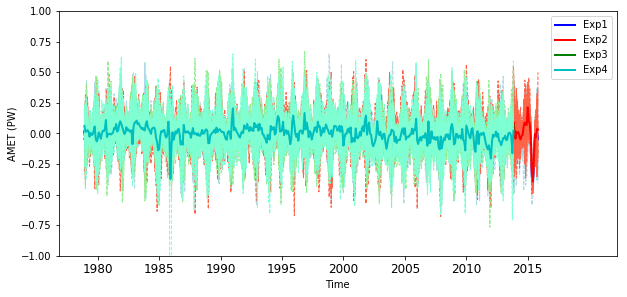

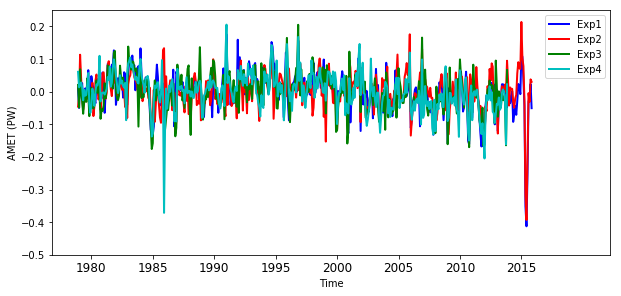

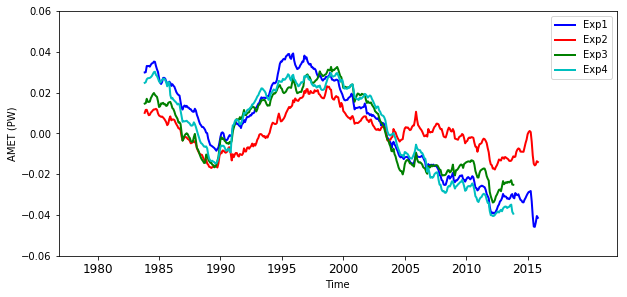

Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data 

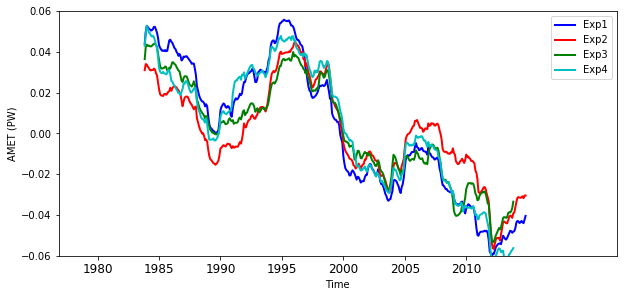

In [8]:
################################   Anomalies at certain sections  ######################################
# lat 60N
lat_DMI_60N = 42
lat_WHOI_60N = 32
lat_NERSC_60N = 32
# lowpass filter window
window=60 # month
# EC Earth (DMI)
ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,lat_DMI_60N])
ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.lowpass(Dim_ens=False)
ens_DMI_exp2 = analyzer.statistics(AMET_DMI_exp2[:,:,:,lat_DMI_60N])
ens_DMI_exp2.anomaly()
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.lowpass(Dim_ens=False)
ens_DMI_exp3 = analyzer.statistics(AMET_DMI_exp3[:,:,:,lat_DMI_60N])
ens_DMI_exp3.anomaly()
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.lowpass(Dim_ens=False)
ens_DMI_exp4 = analyzer.statistics(AMET_DMI_exp4[:,:,:,lat_DMI_60N])
ens_DMI_exp4.anomaly()
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,lat_DMI_60N],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.lowpass(Dim_ens=False)

# EC Earth (DMI)
ens, yy, mm, _ = AMET_DMI_exp1.shape
ens_3, yy_3, mm_3, _ = AMET_DMI_exp3.shape
index = np.arange(yy*mm)
index_3 = np.arange(yy_3*mm_3)
index_year = np.arange(1980,2020,5)
fig = plt.figure(figsize=(10,4.5))
# Exp1
for i in range(ens):
    plt.plot(index, ens_DMI_exp1._anomaly[i,:], color='lightblue',
             linestyle='--', linewidth=1)
plt.plot(index, ens_avg_DMI_exp1._anomaly, 'b', linewidth=2, label='Exp1')
# Exp2
for i in range(ens):
    plt.plot(index, ens_DMI_exp2._anomaly[i,:], color='tomato',
             linestyle='--', linewidth=1)
plt.plot(index, ens_avg_DMI_exp2._anomaly, 'r', linewidth=2, label='Exp2')
# Exp3
for i in range(ens_3):
    plt.plot(index_3, ens_DMI_exp3._anomaly[i,:], color='lightgreen',
             linestyle='--', linewidth=1)
plt.plot(index_3, ens_avg_DMI_exp3._anomaly, 'g', linewidth=2, label='Exp3')
# Exp4
for i in range(ens_3):
    plt.plot(index_3, ens_DMI_exp4._anomaly[i,:], color='aquamarine',
             linestyle='--', linewidth=1)
plt.plot(index_3, ens_avg_DMI_exp4._anomaly, 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(-1,1)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'DMI_series_anomaly_60N.png'),dpi=300)
plt.close(fig)

# EC Earth (DMI) ensemble mean only
fig = plt.figure(figsize=(10,4.5))
# Exp1
plt.plot(index, ens_avg_DMI_exp1._anomaly, 'b', linewidth=2, label='Exp1')
# Exp2
plt.plot(index, ens_avg_DMI_exp2._anomaly, 'r', linewidth=2, label='Exp2')
# Exp3
plt.plot(index_3, ens_avg_DMI_exp3._anomaly, 'g', linewidth=2, label='Exp3')
# Exp4
plt.plot(index_3, ens_avg_DMI_exp4._anomaly, 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(-0.5,0.25)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'DMI_series_anomaly_60N_ensAvg.png'),dpi=300)
plt.close(fig)

# EC Earth (DMI) interannual
fig = plt.figure(figsize=(10,4.5))
# Exp1
plt.plot(index[window-1:], ens_avg_DMI_exp1._lowpass, 'b', linewidth=2, label='Exp1')
# Exp2
plt.plot(index[window-1:], ens_avg_DMI_exp2._lowpass, 'r', linewidth=2, label='Exp2')
# Exp3
plt.plot(index_3[window-1:], ens_avg_DMI_exp3._lowpass, 'g', linewidth=2, label='Exp3')
# Exp4
plt.plot(index_3[window-1:], ens_avg_DMI_exp4._lowpass, 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(-0.06,0.06)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'DMI_series_anomaly_60N_ensAvg_lowpass_{}.png'.format(window)),dpi=300)
plt.close(fig)

# NorESM (NERSC)
lat_NERSC_60N = 32
ens_NERSC_exp1 = analyzer.statistics(AMET_NERSC_exp1[:,:,:,lat_NERSC_60N])
ens_NERSC_exp1.anomaly()
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.lowpass(Dim_ens=False)
ens_NERSC_exp2 = analyzer.statistics(AMET_NERSC_exp2[:,:,:,lat_NERSC_60N])
ens_NERSC_exp2.anomaly()
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.lowpass(Dim_ens=False)
ens_NERSC_exp3 = analyzer.statistics(AMET_NERSC_exp3[:,:,:,lat_DMI_60N])
ens_NERSC_exp3.anomaly()
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.lowpass(Dim_ens=False)
ens_NERSC_exp4 = analyzer.statistics(AMET_NERSC_exp4[:,:,:,lat_NERSC_60N])
ens_NERSC_exp4.anomaly()
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,lat_NERSC_60N],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.lowpass(Dim_ens=False)

ens, yy, mm, _ = AMET_NERSC_exp1.shape
ens_3, yy_3, mm_3, _ = AMET_NERSC_exp3.shape
index = np.arange(yy*mm)
index_3 = np.arange(yy_3*mm_3)
index_year = np.arange(1980,2020,5)

# NorESM (NERSC) interannual
fig = plt.figure(figsize=(10,4.5))
# Exp1
plt.plot(index[window-1:], ens_avg_NERSC_exp1._lowpass, 'b', linewidth=2, label='Exp1')
# Exp2
plt.plot(index[window-1:], ens_avg_NERSC_exp2._lowpass, 'r', linewidth=2, label='Exp2')
# Exp3
plt.plot(index_3[window-1:], ens_avg_NERSC_exp3._lowpass, 'g', linewidth=2, label='Exp3')
# Exp4
plt.plot(index_3[window-1:], ens_avg_NERSC_exp4._lowpass, 'c', linewidth=2, label='Exp4')
plt.xlabel("Time")
plt.xticks(np.arange(13,yy*12+1,60), index_year,fontsize=12)
plt.xlim(-25,520)
plt.ylabel("AMET (PW)")
plt.ylim(-0.06,0.06)
plt.legend(loc=1)
plt.show()
fig.savefig(os.path.join(output_path,'NERSC_series_anomaly_60N_ensAvg_lowpass_{}.png'.format(window)),dpi=300)
plt.close(fig)

Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data 

/home/ESLT0068/NLeSC/Computation_Modeling/BlueAction/WP3/Scripts/JointAnalysis/Analysis/analyzer.py:206: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a[i], b[i] = np.linalg.lstsq(A,series[:,i])[0]


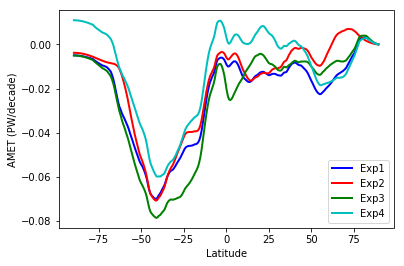

Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data does not have the dimension of ensemble.
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
Ensemble member should always be the first dimension!
The output anomaly time series only contains one dimension for time!
Input array should have dimensions (ensemble,year,month,lat)
The input data 

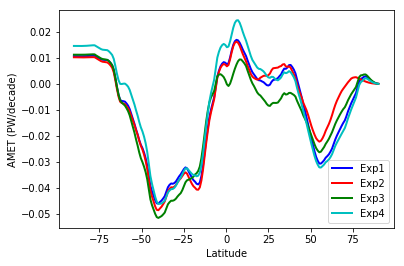

In [10]:
################################   Trend at each latitudes  ######################################
# EC Earth (DMI)
ens_DMI_exp1 = analyzer.statistics(AMET_DMI_exp1[:,:,:,:])
ens_DMI_exp1.anomaly()
#ens_DMI_exp1.lowpass()
ens_avg_DMI_exp1 = analyzer.statistics(np.mean(AMET_DMI_exp1[:,:,:,:],0))
ens_avg_DMI_exp1.anomaly(Dim_ens=False)
ens_avg_DMI_exp1.trend(Dim_ens=False)
ens_DMI_exp2 = analyzer.statistics(AMET_DMI_exp2[:,:,:,:])
ens_DMI_exp2.anomaly()
ens_avg_DMI_exp2 = analyzer.statistics(np.mean(AMET_DMI_exp2[:,:,:,:],0))
ens_avg_DMI_exp2.anomaly(Dim_ens=False)
ens_avg_DMI_exp2.trend(Dim_ens=False)
ens_DMI_exp3 = analyzer.statistics(AMET_DMI_exp3[:,:,:,:])
ens_DMI_exp3.anomaly()
ens_avg_DMI_exp3 = analyzer.statistics(np.mean(AMET_DMI_exp3[:,:,:,:],0))
ens_avg_DMI_exp3.anomaly(Dim_ens=False)
ens_avg_DMI_exp3.trend(Dim_ens=False)
ens_DMI_exp4 = analyzer.statistics(AMET_DMI_exp4[:,:,:,:])
ens_DMI_exp4.anomaly()
ens_avg_DMI_exp4 = analyzer.statistics(np.mean(AMET_DMI_exp4[:,:,:,:],0))
ens_avg_DMI_exp4.anomaly(Dim_ens=False)
ens_avg_DMI_exp4.trend(Dim_ens=False)

# EC Earth (DMI) trend
fig = plt.figure()
# Exp1
plt.plot(lat_DMI, ens_avg_DMI_exp1._a*120, 'b', linewidth=2, label='Exp1')
# Exp2
plt.plot(lat_DMI, ens_avg_DMI_exp2._a*120, 'r', linewidth=2, label='Exp2')
# Exp3
plt.plot(lat_DMI, ens_avg_DMI_exp3._a*120, 'g', linewidth=2, label='Exp3')
# Exp4
plt.plot(lat_DMI, ens_avg_DMI_exp4._a*120, 'c', linewidth=2, label='Exp4')
plt.xlabel("Latitude")
plt.xticks()
plt.ylabel("AMET (PW/decade)")
#plt.ylim(-0.06,0.06)
plt.legend(loc=4)
plt.show()
fig.savefig(os.path.join(output_path,'DMI_series_anomaly_60N_ensAvg_trend.png'),dpi=300)
plt.close(fig)

################################   Trend at each latitudes  ######################################
# NorESM (NERSC)
ens_NERSC_exp1 = analyzer.statistics(AMET_NERSC_exp1[:,:,:,:])
ens_NERSC_exp1.anomaly()
#ens_NERSC_exp1.lowpass()
ens_avg_NERSC_exp1 = analyzer.statistics(np.mean(AMET_NERSC_exp1[:,:,:,:],0))
ens_avg_NERSC_exp1.anomaly(Dim_ens=False)
ens_avg_NERSC_exp1.trend(Dim_ens=False)
ens_NERSC_exp2 = analyzer.statistics(AMET_NERSC_exp2[:,:,:,:])
ens_NERSC_exp2.anomaly()
ens_avg_NERSC_exp2 = analyzer.statistics(np.mean(AMET_NERSC_exp2[:,:,:,:],0))
ens_avg_NERSC_exp2.anomaly(Dim_ens=False)
ens_avg_NERSC_exp2.trend(Dim_ens=False)
ens_NERSC_exp3 = analyzer.statistics(AMET_NERSC_exp3[:,:,:,:])
ens_NERSC_exp3.anomaly()
ens_avg_NERSC_exp3 = analyzer.statistics(np.mean(AMET_NERSC_exp3[:,:,:,:],0))
ens_avg_NERSC_exp3.anomaly(Dim_ens=False)
ens_avg_NERSC_exp3.trend(Dim_ens=False)
ens_NERSC_exp4 = analyzer.statistics(AMET_NERSC_exp4[:,:,:,:])
ens_NERSC_exp4.anomaly()
ens_avg_NERSC_exp4 = analyzer.statistics(np.mean(AMET_NERSC_exp4[:,:,:,:],0))
ens_avg_NERSC_exp4.anomaly(Dim_ens=False)
ens_avg_NERSC_exp4.trend(Dim_ens=False)

# NorESM (NERSC)
fig = plt.figure()
# Exp1
plt.plot(lat_NERSC, ens_avg_NERSC_exp1._a*120, 'b', linewidth=2, label='Exp1') #(PW/decade)
# Exp2
plt.plot(lat_NERSC, ens_avg_NERSC_exp2._a*120, 'r', linewidth=2, label='Exp2')
# Exp3
plt.plot(lat_NERSC, ens_avg_NERSC_exp3._a*120, 'g', linewidth=2, label='Exp3')
# Exp4
plt.plot(lat_NERSC, ens_avg_NERSC_exp4._a*120, 'c', linewidth=2, label='Exp4')
plt.xlabel("Latitude")
plt.xticks()
plt.ylabel("AMET (PW/decade)")
#plt.ylim(-0.06,0.06)
plt.legend(loc=4)
plt.show()
fig.savefig(os.path.join(output_path,'NERSC_series_anomaly_60N_ensAvg_trend.png'),dpi=300)
plt.close(fig)